This is for research question 3.

What role do key personnel (actors and directors) play in shaping a movie's ending?

Do certain actors or directors have a preference for particular types of endings, and do their choices influence the overall predictability of a movie’s outcome?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# path
DATA_FOLDER = '../../Data/MovieSummaries/'
MOVIE_DATASET = DATA_FOLDER + 'movies_dataset_cleaned.tsv'

# Dataset loading
movies = pd.read_csv(MOVIE_DATASET, sep='\t')


In [4]:
movies.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Release year,Movie genres,Movie languages,Movie countries,Score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,"Thriller, Science Fiction, Horror, Adventure, ...",English Language,United States of America,3.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,"Mystery, Biographical film, Drama, Crime Drama",English Language,United States of America,5.0
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,"Short Film, Silent film, Indie, Black-and-whit...","Silent film, English Language",United States of America,3.0
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,"Musical, Comedy, Black-and-white",English Language,United States of America,4.0
4,6631279,/m/0gffwj,Little city,1997-04-04,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997,"Romantic comedy, Ensemble Film, Comedy-drama, ...",English Language,United States of America,4.0


In [5]:
with open('../../Data/MovieSummaries/movie_data_from_tmdb.pkl', 'rb') as file:
    movie_data_from_tmdb = pickle.load(file)

In [6]:
# add director to the dataset
def find_director(movie_data_from_tmdb_single):
    try:
        crew = movie_data_from_tmdb_single['credits']['crew']
    except KeyError:
        return pd.NA
    for person in crew:
        if person['job'] == 'Director':
            return person['name']
    return pd.NA

movies['director'] = movies['Wikipedia movie ID'].map(lambda x: find_director(movie_data_from_tmdb[x]) if x in movie_data_from_tmdb else pd.NA)

In [31]:
# add writer to the dataset
def find_writer(movie_data_from_tmdb_single):
    try:
        crew = movie_data_from_tmdb_single['credits']['crew']
    except KeyError:
        return pd.NA
    for person in crew:
        if person['job'] == 'Writer':
            return person['name']
    return pd.NA

movies['writer'] = movies['Wikipedia movie ID'].map(lambda x: find_writer(movie_data_from_tmdb[x]) if x in movie_data_from_tmdb else pd.NA)

In [32]:
# add vote average and revenue to the dataset
def find_vote_average(movie_data_from_tmdb_single):
    try:
        return movie_data_from_tmdb_single['details']['vote_average']
    except KeyError:
        return pd.NA

def find_revenue(movie_data_from_tmdb_single):
    try:
        return movie_data_from_tmdb_single['details']['revenue']
    except KeyError:
        return pd.NA

movies['vote_average'] = movies['Wikipedia movie ID'].map(lambda x: find_vote_average(movie_data_from_tmdb[x]) if x in movie_data_from_tmdb else pd.NA)
movies['revenue'] = movies['Wikipedia movie ID'].map(lambda x: find_revenue(movie_data_from_tmdb[x]) if x in movie_data_from_tmdb else pd.NA)

In [33]:
movies.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Release year,Movie genres,Movie languages,Movie countries,Score,director,vote_average,revenue,writer
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,"Thriller, Science Fiction, Horror, Adventure, ...",English Language,United States of America,3.0,John Carpenter,5.1,14010832,John Carpenter
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,"Mystery, Biographical film, Drama, Crime Drama",English Language,United States of America,5.0,Edward Lucas,8.0,0,<NA>
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,"Short Film, Silent film, Indie, Black-and-whit...","Silent film, English Language",United States of America,3.0,Henry Lehrman,6.0,0,Fred Niblo
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,"Musical, Comedy, Black-and-white",English Language,United States of America,4.0,Henry King,6.6,4000000,<NA>
4,6631279,/m/0gffwj,Little city,1997-04-04,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997,"Romantic comedy, Ensemble Film, Comedy-drama, ...",English Language,United States of America,4.0,Hervé Palud,6.0,0,<NA>


In [ ]:
# drop movies without director
movies_filtered = movies.dropna(subset=['director'])

# drop movies without vote average or revenue
movies_filtered = movies_filtered.dropna(subset=['vote_average', 'revenue'])

# drop movies with revenue less than 1000
movies_filtered = movies_filtered[movies_filtered['revenue'] > 1000]

In [10]:
# count the number of movies per director
director_counts = movies_filtered['director'].value_counts()
director_counts

director
Clint Eastwood      32
Steven Spielberg    32
Brian De Palma      28
Joel Schumacher     27
Woody Allen         26
                    ..
Edward Laemmle       1
Keita Kono           1
H. C. Potter         1
Adam Rapp            1
Trần Anh Hùng        1
Name: count, Length: 3481, dtype: int64

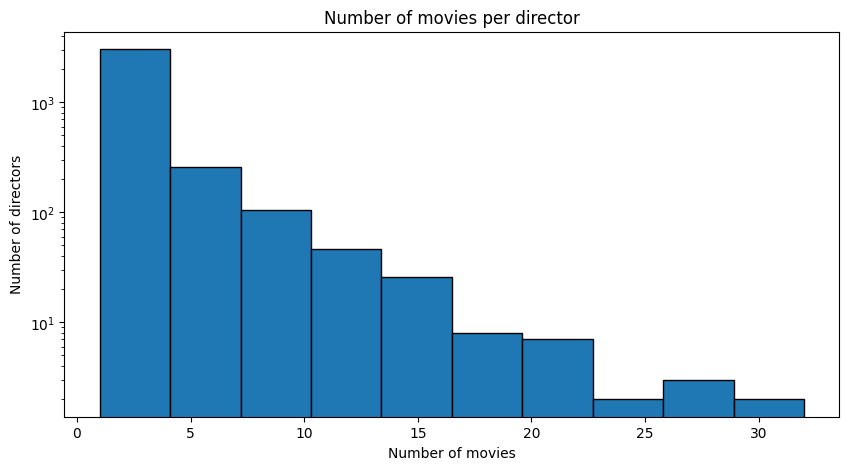

In [11]:
# plot the number of movies per director
plt.figure(figsize=(10, 5))
plt.hist(director_counts, edgecolor='black', log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of directors')
plt.title('Number of movies per director')
plt.show()

In [12]:
# filter out directors with more than 4 movies
directors = director_counts[director_counts > 4].index
movies_filtered = movies_filtered[movies_filtered['director'].isin(directors)]

# count the number of movies per director
director_counts_filtered = movies_filtered['director'].value_counts()
director_counts_filtered

director
Steven Spielberg    32
Clint Eastwood      32
Brian De Palma      28
Joel Schumacher     27
Woody Allen         26
                    ..
Sofia Coppola        5
Richard Eyre         5
Steven Brill         5
Michael Moore        5
Andrew Bergman       5
Name: count, Length: 457, dtype: int64

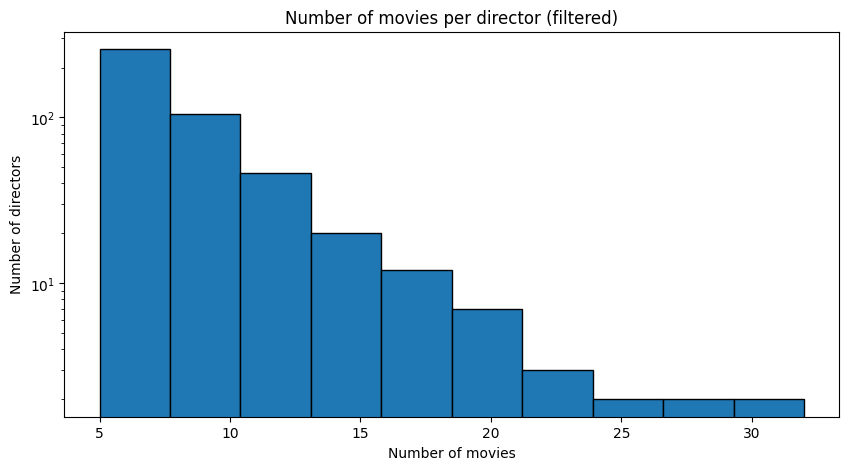

In [13]:
# plot the number of movies per director
plt.figure(figsize=(10, 5))
plt.hist(director_counts_filtered, edgecolor='black', log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of directors')
plt.title('Number of movies per director (filtered)')
plt.show()

In [14]:
# count the number of movies per director, separated by the score of the movie
director_counts_filtered_score = movies_filtered.groupby(['director', 'Score']).size()
director_counts_filtered_score

director       Score
Abel Ferrara   3.0      2
               4.0      1
Adam McKay     3.0      2
               4.0      1
Adam Shankman  3.0      1
                       ..
Zack Snyder    3.0      2
Zhang Yimou    3.0      4
               4.0      1
Éric Toledano  3.0      2
               4.0      2
Length: 952, dtype: int64

In [15]:
# calculate the average score per director, and sort the directors by score
director_avg_score = movies_filtered.groupby('director')['Score'].mean()
director_avg_score = director_avg_score.sort_values(ascending=False)
director_avg_score

director
David Wain             5.000000
Michael Hoffman        4.500000
Lana Wachowski         4.500000
Andrew Bergman         4.333333
David Koepp            4.333333
                         ...   
Joan Micklin Silver         NaN
Joe Dante                   NaN
Joe Russo                   NaN
Nick Cassavetes             NaN
Terence Young               NaN
Name: Score, Length: 457, dtype: float64

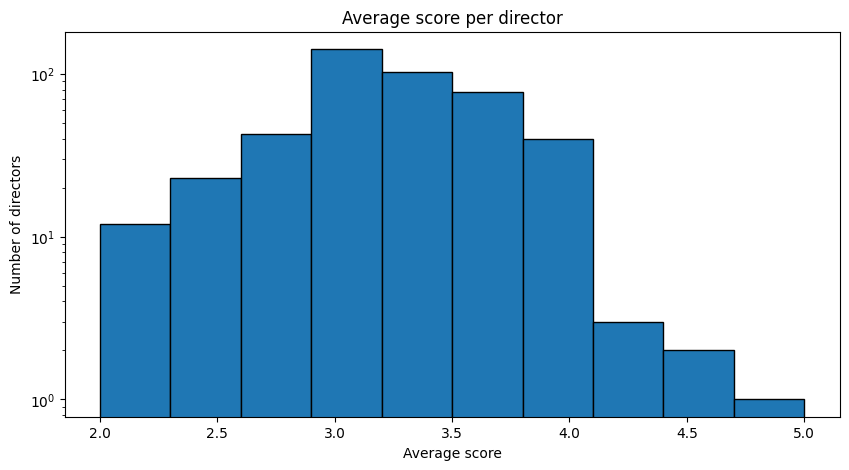

In [16]:
# plot the average score per director
plt.figure(figsize=(10, 5))
plt.hist(director_avg_score, edgecolor='black', log=True)
plt.xlabel('Average score')
plt.ylabel('Number of directors')
plt.title('Average score per director')
plt.show()


In [17]:
# calculate the score variance per director, and sort the directors by variance
director_score_variance = movies_filtered.groupby('director')['Score'].var()
director_score_variance = director_score_variance.sort_values(ascending=False)
director_score_variance

director
Robert Wise        3.000000
Priyadarshan       2.333333
Antoine Fuqua      2.333333
Doug Liman         2.333333
David S. Ward      2.333333
                     ...   
Takashi Shimizu         NaN
Taylor Hackford         NaN
Terence Young           NaN
Tim Story               NaN
Tobe Hooper             NaN
Name: Score, Length: 457, dtype: float64

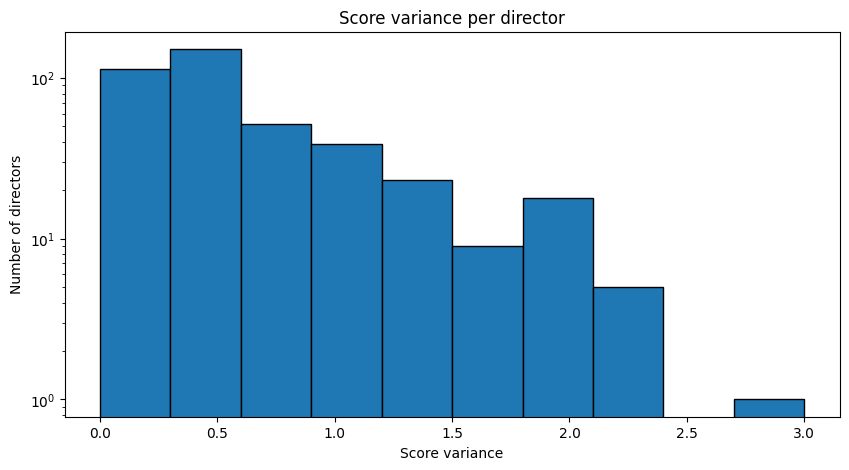

In [18]:
# plot the score variance per director
plt.figure(figsize=(10, 5))
plt.hist(director_score_variance, edgecolor='black', log=True)
plt.xlabel('Score variance')
plt.ylabel('Number of directors')
plt.title('Score variance per director')
plt.show()

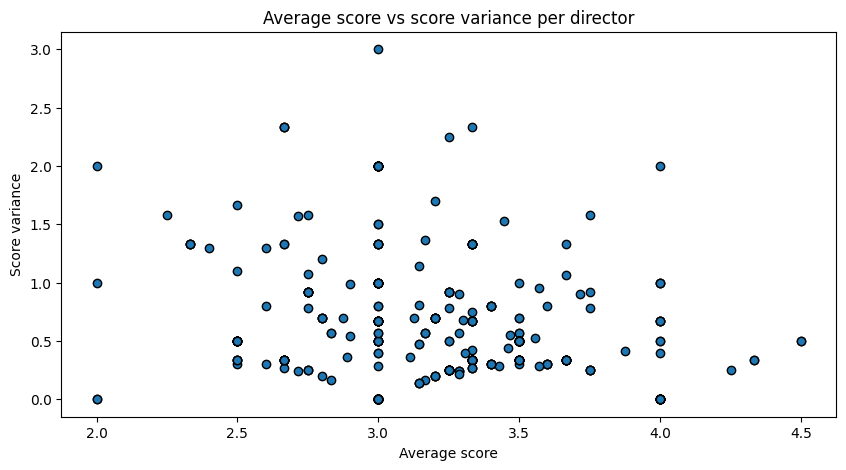

In [61]:
# plot the average score vs the score variance per director
plt.figure(figsize=(10, 5))
x_values = director_avg_score.index
plt.scatter(director_avg_score, director_score_variance[x_values], edgecolor='black')
plt.xlabel('Average score')
plt.ylabel('Score variance')
plt.title('Average score vs score variance per director')
plt.show()

In [19]:
# calculate the average revenue per director, and sort the directors by revenue
director_avg_revenue = movies_filtered.groupby('director')['revenue'].mean()
director_avg_revenue = director_avg_revenue.sort_values(ascending=False)
director_avg_revenue

director
Joss Whedon             1222826304.8
James Cameron           1111498680.0
Joe Russo               1066990447.2
Chris Renaud             715131603.8
Bill Condon         663223935.555556
                          ...       
Abel Ferrara               1168165.4
Gaspar Noé             995173.909091
Tod Browning                787500.0
Gregg Araki                 658715.8
David Hugh Jones            603071.8
Name: revenue, Length: 457, dtype: object

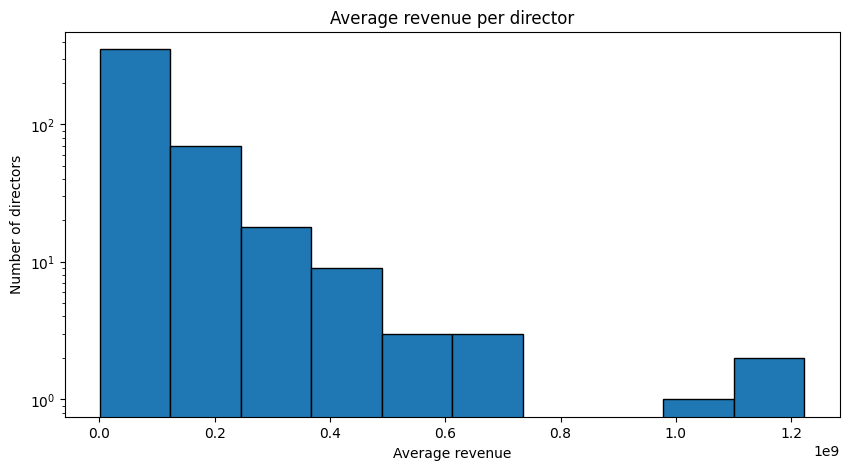

In [20]:
# plot the average revenue per director
plt.figure(figsize=(10, 5))
plt.hist(director_avg_revenue, edgecolor='black', log=True)
plt.xlabel('Average revenue')
plt.ylabel('Number of directors')
plt.title('Average revenue per director')
plt.show()

In [21]:
# calculate the average vote average per director, and sort the directors by vote average
director_avg_vote_average = movies_filtered.groupby('director')['vote_average'].mean()
director_avg_vote_average = director_avg_vote_average.sort_values(ascending=False)
director_avg_vote_average

director
Alexandre de La Patellière       8.281
Sergio Leone                  8.260333
Hayao Miyazaki                8.019222
Stanley Kubrick                  7.919
Frank Darabont                     7.9
                                ...   
Andrew Bergman                   5.485
Anees Bazmee                       5.3
Mark Griffiths                    4.88
James Toback                  4.717143
Uwe Boll                      3.842857
Name: vote_average, Length: 457, dtype: object

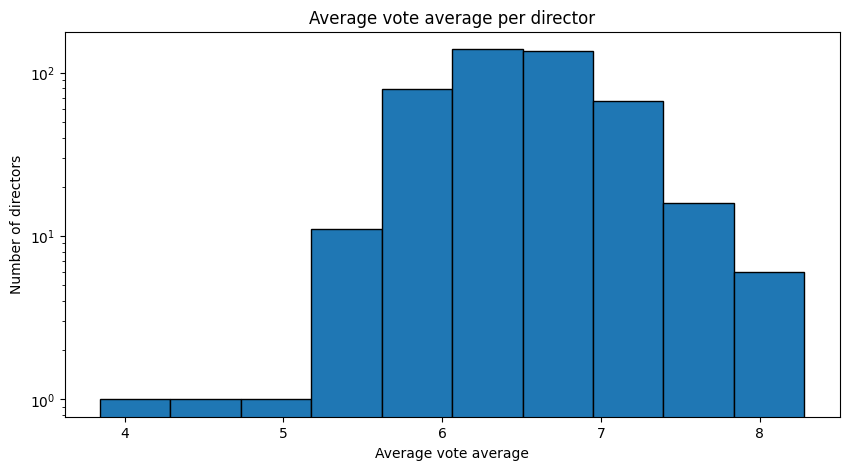

In [22]:
# plot the average vote average per director
plt.figure(figsize=(10, 5))
plt.hist(director_avg_vote_average, edgecolor='black', log=True)
plt.xlabel('Average vote average')
plt.ylabel('Number of directors')
plt.title('Average vote average per director')
plt.show()

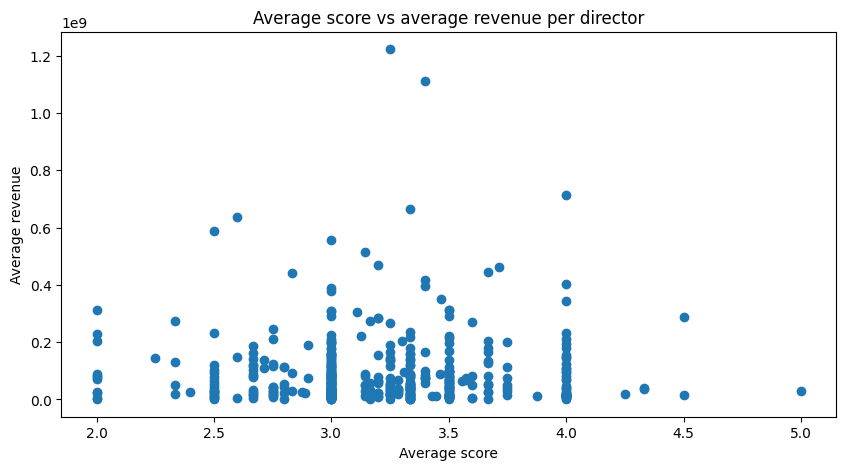

In [23]:
# analyze the correlation between the average score and the average revenue per director
plt.figure(figsize=(10, 5))
x_values = director_avg_score.index
plt.scatter(director_avg_score, director_avg_revenue[x_values])
plt.xlabel('Average score')
plt.ylabel('Average revenue')
plt.title('Average score vs average revenue per director')
plt.show()

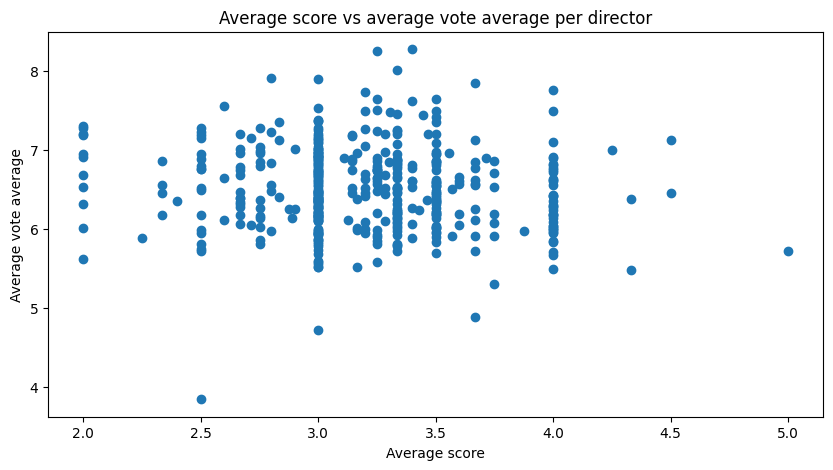

In [24]:
# analyze the correlation between the average score and the average vote average per director
plt.figure(figsize=(10, 5))
x_values = director_avg_score.index
plt.scatter(director_avg_score, director_avg_vote_average[x_values])
plt.xlabel('Average score')
plt.ylabel('Average vote average')
plt.title('Average score vs average vote average per director')
plt.show()

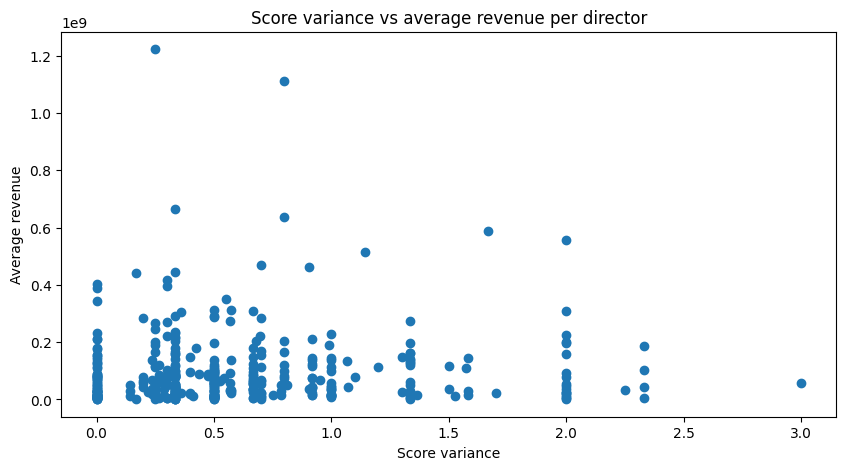

In [25]:
# analyze the correlation between the score variance and the average revenue per director
plt.figure(figsize=(10, 5))
x_values = director_score_variance.index
plt.scatter(director_score_variance, director_avg_revenue[x_values])
plt.xlabel('Score variance')
plt.ylabel('Average revenue')
plt.title('Score variance vs average revenue per director')
plt.show()

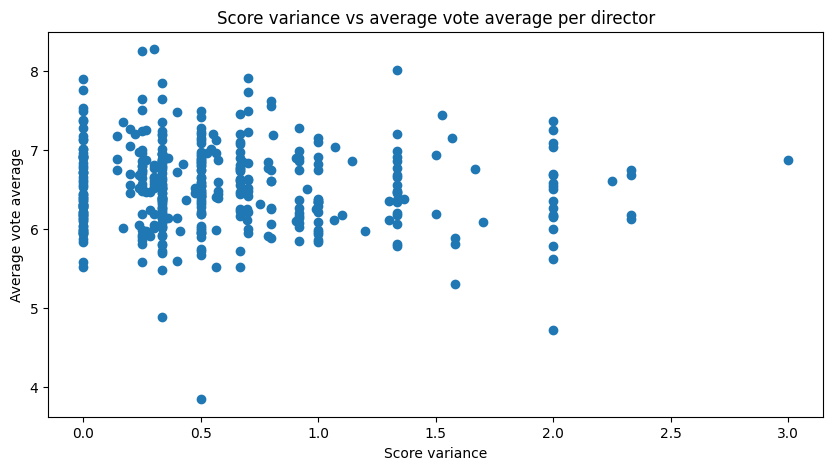

In [26]:
# analyze the correlation between the score variance and the average vote average per director
plt.figure(figsize=(10, 5))
x_values = director_score_variance.index
plt.scatter(director_score_variance, director_avg_vote_average[x_values])
plt.xlabel('Score variance')
plt.ylabel('Average vote average')
plt.title('Score variance vs average vote average per director')
plt.show()

In [27]:
# use t test to check if the average score is significantly different between directors with high and low revenue
from scipy.stats import ttest_ind

high_revenue_directors = director_avg_revenue[director_avg_revenue > 0.2e9].index
low_revenue_directors = director_avg_revenue[director_avg_revenue < 0.2e9].index

high_revenue_director_avg_score = director_avg_score[high_revenue_directors].dropna()
low_revenue_director_avg_score = director_avg_score[low_revenue_directors].dropna()

t_stat, p_value = ttest_ind(high_revenue_director_avg_score, low_revenue_director_avg_score)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The average score is significantly different between directors with high and low revenue')
else:
    print('The average score is not significantly different between directors with high and low revenue')


t stat: 0.19807215385696594
p value: 0.8430792653904904
The average score is not significantly different between directors with high and low revenue


In [28]:
# use t test to check if the average score is significantly different between directors with high and low vote average

high_vote_average_directors = director_avg_vote_average[director_avg_vote_average > 7].index
low_vote_average_directors = director_avg_vote_average[director_avg_vote_average < 7].index

high_vote_average_director_avg_score = director_avg_score[high_vote_average_directors].dropna()
low_vote_average_director_avg_score = director_avg_score[low_vote_average_directors].dropna()

t_stat, p_value = ttest_ind(high_vote_average_director_avg_score, low_vote_average_director_avg_score)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The average score is significantly different between directors with high and low vote average')
else:
    print('The average score is not significantly different between directors with high and low vote average')

t stat: -1.8992327608720196
p value: 0.05818174321154186
The average score is not significantly different between directors with high and low vote average


In [29]:
# use t test to check if the score variance is significantly different between directors with high and low revenue

high_revenue_director_score_variance = director_score_variance[high_revenue_directors].dropna()
low_revenue_director_score_variance = director_score_variance[low_revenue_directors].dropna()

t_stat, p_value = ttest_ind(high_revenue_director_score_variance, low_revenue_director_score_variance)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The score variance is significantly different between directors with high and low revenue')
else:
    print('The score variance is not significantly different between directors with high and low revenue')

t stat: 0.1341571481603897
p value: 0.8933442997805028
The score variance is not significantly different between directors with high and low revenue


In [30]:
# use t test to check if the score variance is significantly different between directors with high and low vote average

high_vote_average_director_score_variance = director_score_variance[high_vote_average_directors].dropna()
low_vote_average_director_score_variance = director_score_variance[low_vote_average_directors].dropna()

t_stat, p_value = ttest_ind(high_vote_average_director_score_variance, low_vote_average_director_score_variance)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The score variance is significantly different between directors with high and low vote average')
else:
    print('The score variance is not significantly different between directors with high and low vote average')

t stat: -0.6690443258661061
p value: 0.5038446635758776
The score variance is not significantly different between directors with high and low vote average


In [35]:
# drop movies without writer
movies_filtered = movies.dropna(subset=['writer'])

# drop movies without vote average or revenue
movies_filtered = movies_filtered.dropna(subset=['vote_average', 'revenue'])

# drop movies with revenue less than 1000
movies_filtered = movies_filtered[movies_filtered['revenue'] > 1000]

In [36]:
# count the number of movies per writer
writer_counts = movies_filtered['writer'].value_counts()
writer_counts

writer
Herbert Kretzmer     13
Luc Besson           12
John Hughes          11
John Sayles          10
Quentin Tarantino    10
                     ..
Greg Mottola          1
Phil Graziadei        1
Winnie Holzman        1
Lars Mering           1
Ben Ripley            1
Name: count, Length: 2293, dtype: int64

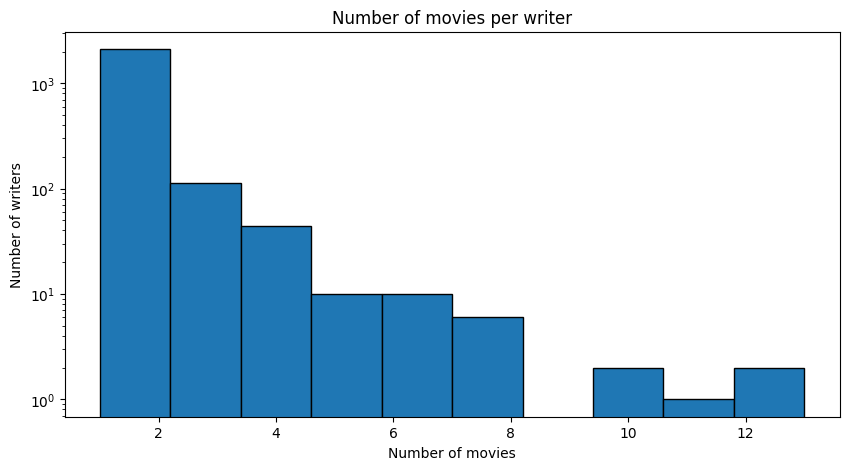

In [39]:
# plot the number of movies per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_counts, edgecolor='black', log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of writers')
plt.title('Number of movies per writer')
plt.show()

In [42]:
# filter out writers with more than 4 movies
writers = writer_counts[writer_counts > 4].index
movies_filtered = movies_filtered[movies_filtered['writer'].isin(writers)]

In [44]:
# count the number of movies per writer
writer_counts_filtered = movies_filtered['writer'].value_counts()
writer_counts_filtered

writer
Herbert Kretzmer       13
Luc Besson             12
John Hughes            11
John Sayles            10
Quentin Tarantino      10
James Cameron           8
Woody Allen             7
James Toback            7
Tyler Perry             7
James Gunn              7
Ice Cube                7
Chris Bremner           6
David S. Goyer          6
Darren Aronofsky        6
Brian De Palma          6
Paul W. S. Anderson     6
Hayao Miyazaki          6
Adam Sandler            6
Wes Craven              6
Lars von Trier          6
Mike White              6
Takao Koyama            5
Brian Helgeland         5
Nancy Meyers            5
Oliver Stone            5
Michael Moore           5
M. Night Shyamalan      5
Kim Min-sung            5
Jesse Lasky Jr.         5
Tommy Chong             5
Neil Simon              5
Name: count, dtype: int64

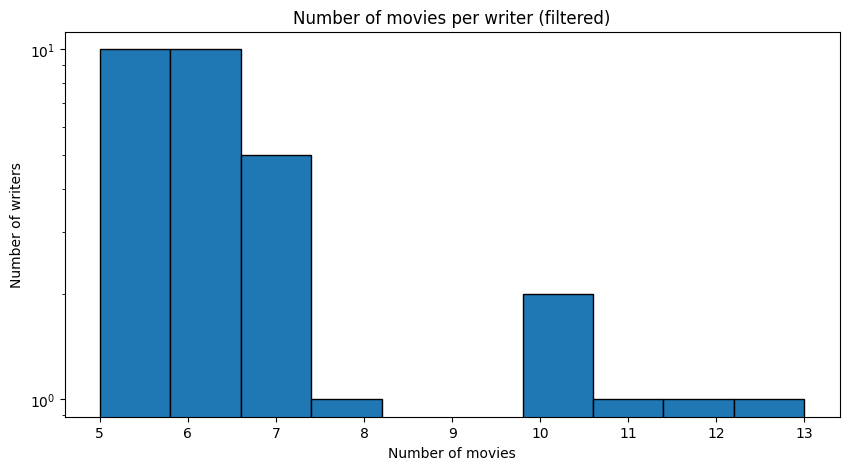

In [45]:
# plot the number of movies per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_counts_filtered, edgecolor='black', log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of writers')
plt.title('Number of movies per writer (filtered)')
plt.show()

In [46]:
# count the number of movies per writer, separated by the score of the movie
writer_counts_filtered_score = movies_filtered.groupby(['writer', 'Score']).size()
writer_counts_filtered_score

writer               Score
Adam Sandler         4.0      1
Brian De Palma       3.0      1
Brian Helgeland      4.0      1
Chris Bremner        4.0      4
Darren Aronofsky     2.0      1
                     3.0      1
                     5.0      1
David S. Goyer       3.0      3
Hayao Miyazaki       4.0      2
Herbert Kretzmer     2.0      1
                     3.0      5
Ice Cube             3.0      3
                     4.0      3
James Cameron        2.0      1
                     3.0      1
                     4.0      2
James Gunn           2.0      1
                     3.0      2
                     4.0      1
James Toback         2.0      1
                     4.0      1
Jesse Lasky Jr.      3.0      1
                     4.0      1
John Hughes          3.0      2
                     4.0      2
John Sayles          3.0      2
                     4.0      1
Kim Min-sung         3.0      1
                     4.0      1
Lars von Trier       4.0      2
Luc Besson   

In [47]:
# calculate the average score per writer, and sort the writers by score
writer_avg_score = movies_filtered.groupby('writer')['Score'].mean()
writer_avg_score = writer_avg_score.sort_values(ascending=False)
writer_avg_score

writer
Mike White             5.000000
Oliver Stone           4.500000
Adam Sandler           4.000000
Brian Helgeland        4.000000
Chris Bremner          4.000000
Hayao Miyazaki         4.000000
Lars von Trier         4.000000
Jesse Lasky Jr.        3.500000
Wes Craven             3.500000
Takao Koyama           3.500000
John Hughes            3.500000
Kim Min-sung           3.500000
Ice Cube               3.500000
Paul W. S. Anderson    3.400000
John Sayles            3.333333
Darren Aronofsky       3.333333
Tyler Perry            3.333333
Nancy Meyers           3.250000
Woody Allen            3.250000
M. Night Shyamalan     3.250000
James Cameron          3.250000
Luc Besson             3.200000
Quentin Tarantino      3.200000
Michael Moore          3.000000
James Gunn             3.000000
David S. Goyer         3.000000
Tommy Chong            3.000000
Brian De Palma         3.000000
James Toback           3.000000
Herbert Kretzmer       2.833333
Neil Simon                  NaN
N

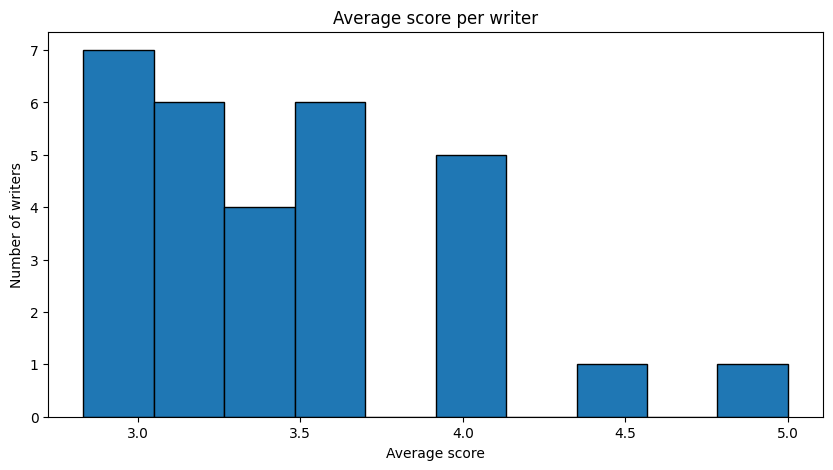

In [49]:
# plot the average score per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_avg_score, edgecolor='black')
plt.xlabel('Average score')
plt.ylabel('Number of writers')
plt.title('Average score per writer')
plt.show()

In [50]:
# calculate the score variance per writer, and sort the writers by variance
writer_score_variance = movies_filtered.groupby('writer')['Score'].var()
writer_score_variance = writer_score_variance.sort_values(ascending=False)
writer_score_variance

writer
Darren Aronofsky       2.333333
James Toback           2.000000
Tommy Chong            1.000000
James Cameron          0.916667
Woody Allen            0.916667
Paul W. S. Anderson    0.800000
Luc Besson             0.700000
Quentin Tarantino      0.700000
James Gunn             0.666667
Jesse Lasky Jr.        0.500000
Takao Koyama           0.500000
Kim Min-sung           0.500000
Oliver Stone           0.500000
Wes Craven             0.500000
Tyler Perry            0.333333
John Hughes            0.333333
John Sayles            0.333333
Ice Cube               0.300000
M. Night Shyamalan     0.250000
Nancy Meyers           0.250000
Herbert Kretzmer       0.166667
Chris Bremner          0.000000
Michael Moore          0.000000
Hayao Miyazaki         0.000000
David S. Goyer         0.000000
Lars von Trier         0.000000
Adam Sandler                NaN
Brian De Palma              NaN
Brian Helgeland             NaN
Mike White                  NaN
Neil Simon                  NaN
N

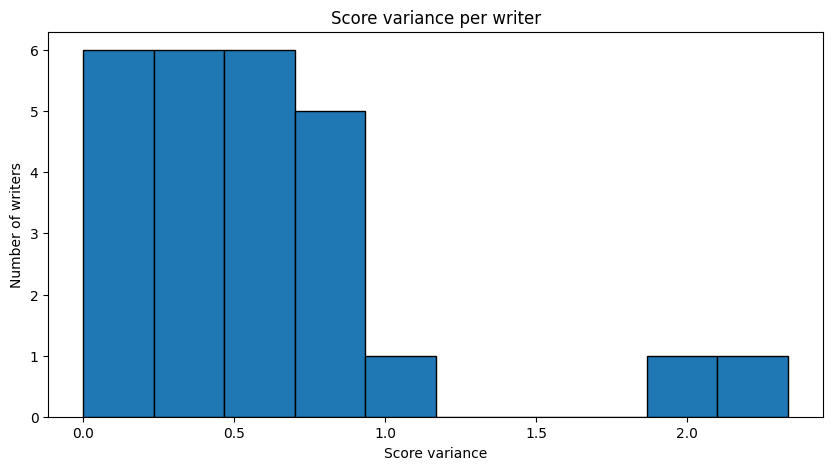

In [51]:
# plot the score variance per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_score_variance, edgecolor='black')
plt.xlabel('Score variance')
plt.ylabel('Number of writers')
plt.title('Score variance per writer')
plt.show()

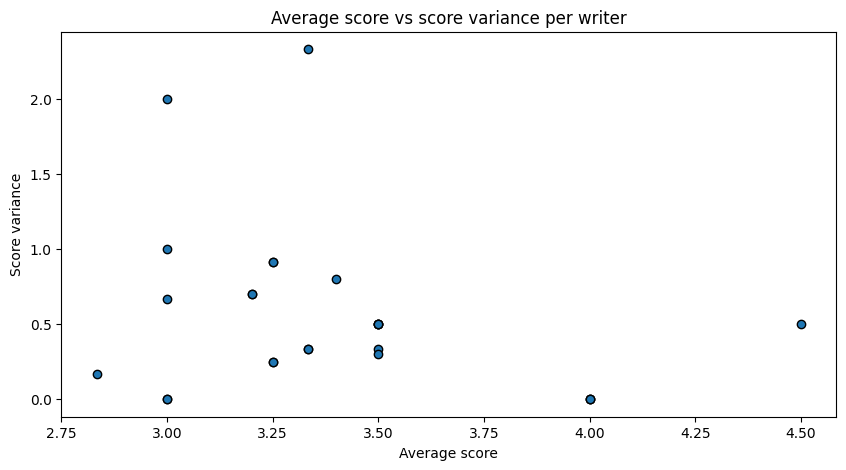

In [62]:
# plot the score variance vs the average score per writer
plt.figure(figsize=(10, 5))
x_values = writer_avg_score.index
plt.scatter(writer_avg_score, writer_score_variance[x_values], edgecolor='black')
plt.xlabel('Average score')
plt.ylabel('Score variance')
plt.title('Average score vs score variance per writer')
plt.show()

In [52]:
# calculate the average revenue per writer, and sort the writers by revenue
writer_avg_revenue = movies_filtered.groupby('writer')['revenue'].mean()
writer_avg_revenue = writer_avg_revenue.sort_values(ascending=False)
writer_avg_revenue

writer
James Cameron             1529840854.25
Herbert Kretzmer            442636309.0
Chris Bremner               402529640.0
M. Night Shyamalan          382822776.2
Mike White             344564576.166667
Paul W. S. Anderson         183104515.0
Hayao Miyazaki         164459642.666667
Quentin Tarantino           136580982.6
Adam Sandler           108995756.333333
Nancy Meyers                108143498.4
Luc Besson             103426575.583333
David S. Goyer               97496752.5
Kim Min-sung                 83410298.0
Brian Helgeland              79059854.6
Michael Moore                60131913.8
Tyler Perry             57241800.714286
Woody Allen             55337038.714286
Darren Aronofsky             44516999.0
John Hughes             42038875.727273
John Sayles                  40164211.9
James Gunn              39702584.714286
Neil Simon                   38568058.8
Wes Craven              36860385.166667
Tommy Chong                  35479996.0
Ice Cube                28350497.

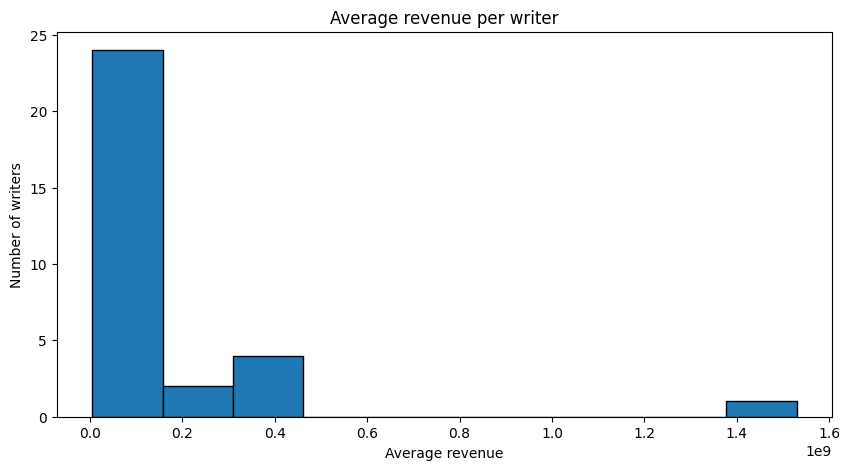

In [53]:
# plot the average revenue per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_avg_revenue, edgecolor='black')
plt.xlabel('Average revenue')
plt.ylabel('Number of writers')
plt.title('Average revenue per writer')
plt.show()

In [54]:
# calculate the average vote average per writer, and sort the writers by vote average
writer_avg_vote_average = movies_filtered.groupby('writer')['vote_average'].mean()
writer_avg_vote_average = writer_avg_vote_average.sort_values(ascending=False)
writer_avg_vote_average

writer
Hayao Miyazaki         8.012167
James Cameron          7.695375
Quentin Tarantino        7.5516
Chris Bremner               7.5
Herbert Kretzmer           7.33
Lars von Trier         7.205833
Kim Min-sung                7.2
Michael Moore             7.142
Oliver Stone             7.0856
Darren Aronofsky          6.972
Brian De Palma         6.816667
Woody Allen            6.770143
Takao Koyama              6.751
John Sayles              6.7224
John Hughes            6.662727
Tyler Perry            6.614286
Jesse Lasky Jr.             6.5
Ice Cube               6.472857
M. Night Shyamalan       6.4512
Brian Helgeland          6.4318
Mike White             6.387833
Nancy Meyers             6.3568
Wes Craven             6.266667
Luc Besson                6.252
James Gunn                 6.25
Paul W. S. Anderson       6.186
Tommy Chong                6.14
David S. Goyer         5.983333
Neil Simon                5.928
Adam Sandler           5.723167
James Toback           4.717143
N

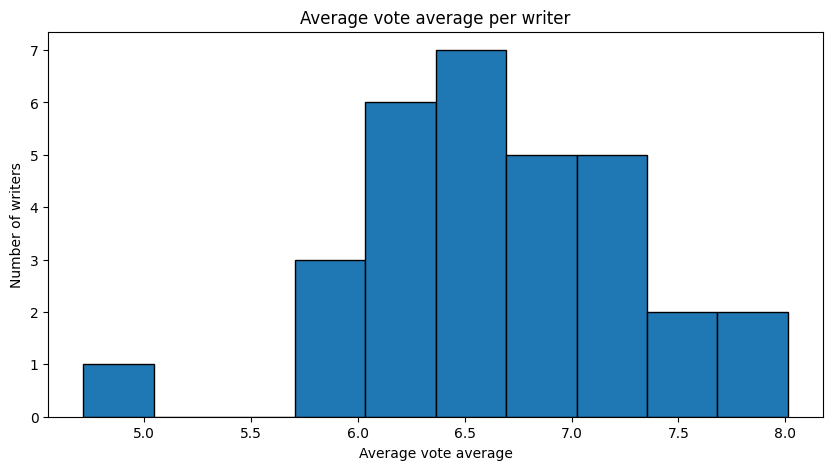

In [55]:
# plot the average vote average per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_avg_vote_average, edgecolor='black')
plt.xlabel('Average vote average')
plt.ylabel('Number of writers')
plt.title('Average vote average per writer')
plt.show()

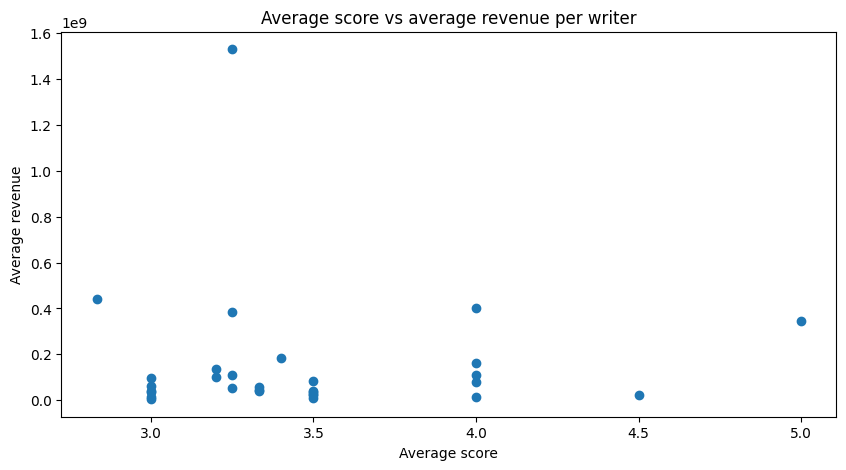

In [56]:
# analyze the correlation between the average score and the average revenue per writer
plt.figure(figsize=(10, 5))
x_values = writer_avg_score.index
plt.scatter(writer_avg_score, writer_avg_revenue[x_values])
plt.xlabel('Average score')
plt.ylabel('Average revenue')
plt.title('Average score vs average revenue per writer')
plt.show()

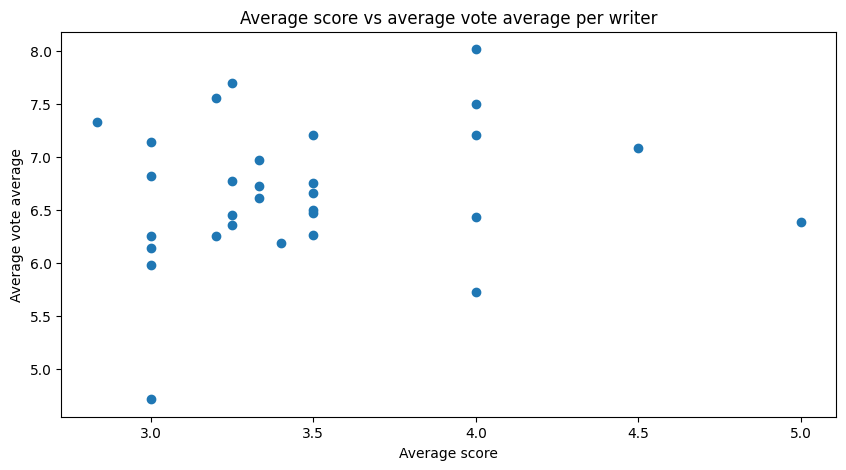

In [57]:
# analyze the correlation between the average score and the average vote average per writer
plt.figure(figsize=(10, 5))
x_values = writer_avg_score.index
plt.scatter(writer_avg_score, writer_avg_vote_average[x_values])
plt.xlabel('Average score')
plt.ylabel('Average vote average')
plt.title('Average score vs average vote average per writer')
plt.show()

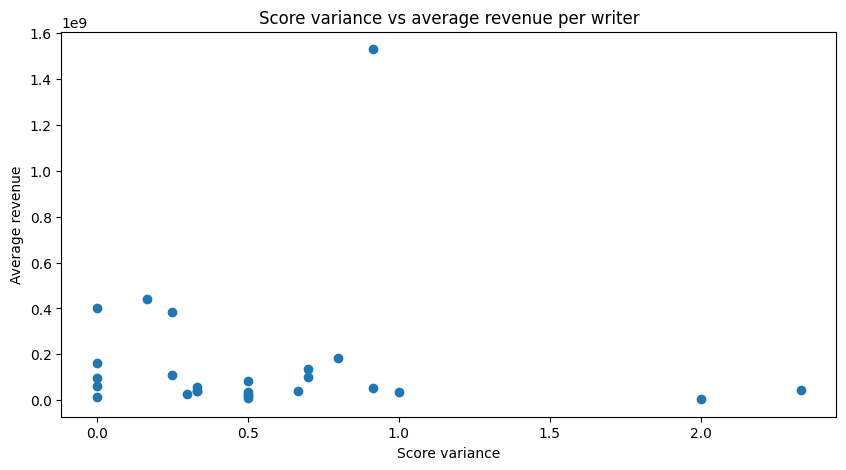

In [58]:
# analyze the correlation between the score variance and the average revenue per writer
plt.figure(figsize=(10, 5))
x_values = writer_score_variance.index
plt.scatter(writer_score_variance, writer_avg_revenue[x_values])
plt.xlabel('Score variance')
plt.ylabel('Average revenue')
plt.title('Score variance vs average revenue per writer')
plt.show()

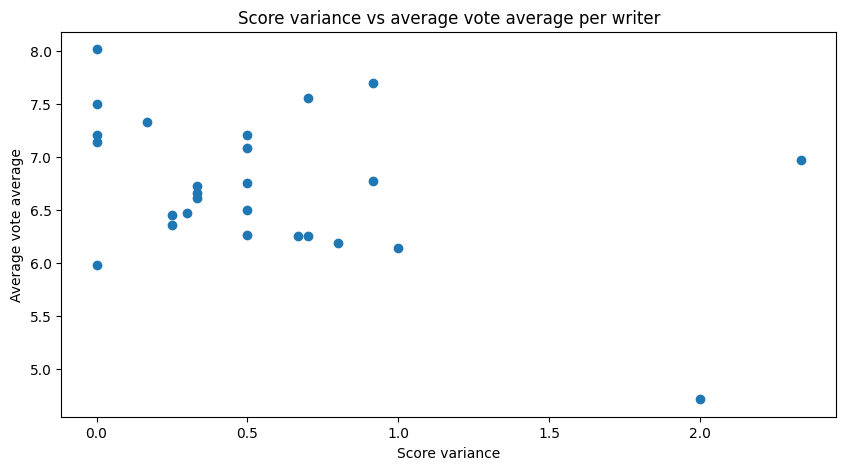

In [59]:
# analyze the correlation between the score variance and the average vote average per writer
plt.figure(figsize=(10, 5))
x_values = writer_score_variance.index
plt.scatter(writer_score_variance, writer_avg_vote_average[x_values])
plt.xlabel('Score variance')
plt.ylabel('Average vote average')
plt.title('Score variance vs average vote average per writer')
plt.show()